<h1 style='text-align: center;'>Clustering Categorical Data with the K-Modes Algorithm in Python</h1>

<h2>Introduction</h2>
<p style='text-indent: 2em;'>The K-Modes algorithm is a modification of the K-Means algorithm for the purpose of clustering categorical data. While there are several variations of the K-Modes algorithm available just like there are for the K-Means algorithm, the version of K-Modes implemented in this notebook is an implementation of the algorithm as it is described in Huang (1998). The K-Modes algorithm differs from the K-Means algorithm in three key ways; first, the distance measure is replaced with simple matching; second, modes of clusters are calculated instead of means of clusters; and third, freqencies are used to update cluster modes in order to reach convergence. In this notebook, the K-Modes algorithm described by Huang(1998) is used to cluster objects in a dataset collected by a popular website called FiveThirtyEight. This dataset was the result of a survey conducted by the website in 2018 designed to measure men's attitudes regarding masculinity.</p>
<p style='text-indent: 2em;'>This project was inspired by a challenge project created by the Codecademy team for their Data Science path, specifically for the path's 16th unit: unsupervised learning with the K-Means algorithm. The challenge project for the unit called for clustering the dataset from FiveThirtyEight with a K-Means algorithm. The dataset though it categorical in nature and therefore does not lend itself very well to clustering with a K-Means algorithm. This is because the distane measure used in a K-Means algorithm, unless otherwise stated for theoretical reasons, is typically Euclidean Distance. This distance measure works well for continuous variables; however, when it comes to categorical data, Euclidean Distance loses its meaning. This is because categorical variables are not continuous and the values that could be said to fall in between values have no real meaning. The K-Modes algorithm solves this problem and allows us to cluster categorical data.</p>

<h2>Getting Started</h2>
<p style='text-indent: 2em;'>For this project, we will need to import the following python libraries and modules: </p>
<ul>
    <li>Numpy</li>
    <li>Pandas</li>
    <li>The Scipy Stats module</li>
    <li>The Matplotlib Pyplot module</li>
</ul>
<p>We will also have to load the FiveThirtyEight dataset. This project will be using a copy of the dataset that is stored locally; however, a copy of the dataset can be downloaded from FiveThirtyEight's <a href='https://github.com/fivethirtyeight/data/tree/master/masculinity-survey' target=_blank>Github repository</a></p>

In [1]:
# Import necessary python libraries and modules
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as py

In [2]:
# Read CSV file into a pandas dataframe to load the dataset
data = pd.read_csv('masculinity.csv')

<h2>The K-Modes Algorithm</h2>
<p style='text-indent: 2em;'>The K-Modes algorithm as described in Huang (1998) is not implemented in any of the most common Python packages used for data analysis; however, an implementation does exist as a stand a-lone package on <a href='https://github.com/nicodv/kmodes' target=_blank >Github</a> that can be installed with pip, created by Nicodv. Examples of other Python implementations for the K-Modes algorithm can be found by searching popular video sharing platforms like YouTube. While a package implementing K-Modes does exist on Github, we will be implementing the algorithm from scratch in this notebook, building it peice by peice.</p>

<h3>How Does the K-Modes Algorithm Work?</h3>
<h4>The Distance Measure</h4>
<p style='text-indent: 2em;'>So before we begin trying to build a K-Modes algorithm, let us first consider conceptually what it is that we are trying to do. We'll begin with the distance measure that is used in the K-Modes algorithm and to do so, let us look at the following notation quoted from page 298 of Huang(1998): </p>

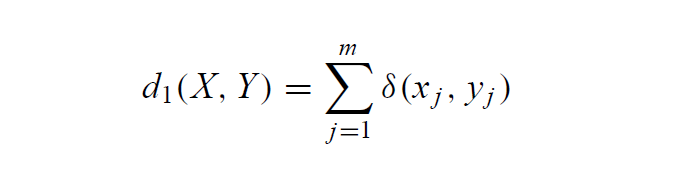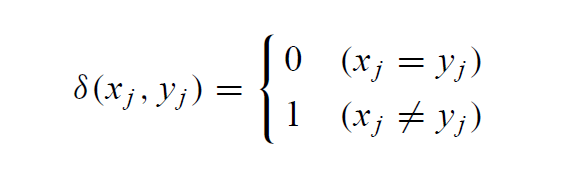
<cite>Notation quoted from Huang(1998), page 289</cite>

<p>Simple matching is used for the distance measure in a K-Modes algorithm. Looking at the notation above: </p>
<ul>
    <li>d1 = distance</li>
    <li>X = an object</li>
    <li>Y = another object</li>
    <li>j = an attribute (a value of a categorical variable)</li>
    <li>m = the total number of attributes</li>
    <li>xj = the value of an attribute of object X</li>
    <li>yj = the value of an attribute of object y</li>
    <li>S = a function of the attributes of objects X and Y</li>
</ul>
<p style='text-indent: 2em;'>Reading the above notation; the distance is a function of any two objects in our dataset: X and Y; and the function is equal to the sum of the function S for all the attributes measured in the dataset for each object. This means that if we have two objects or rows in our dataset and there are ten columns measuring ten different categorical variables or attributes of those objects, we are going to take the values of each of those columns for both objects, put them in function S, and then add the results of function S together. If we take a look at function S, we can see what the function does when we give it the values of the attributes of our two objects. For any attribute, if the value of that attribute is the same for both objects, the function gives us a zero; and if the values are not equal, the function gives us a one. So to restate our distance measure more clearly, the distance for any two (categorical) objects X, Y is equal to the sum of a set of ones and zeros; where the ones and zeros represet whether the values of the attributes for X and Y were equal or not. This is the K-Modes distance measure as described by Huang (1998).</p>
<p style='text-indent: 2em;'>To illustrate how this works, lets do a short example. Imagine we have three objects: X, and Y.</p>
<ul>
    <li>X [ a, b, c, d, e, f ]</li>
    <li>Y [ a, b, c, r, a, e ]</li>
</ul>
<p style='text-indent: 2em;'>The lowercase letters in the brackets above represent the attribute values for each object. Lets apply the K-Modes distance measure to objects X and Y. Comparing the attribute values for X and Y we can see that both objects share the first three values in common, so the output of function S in our distance measure for these three attributes is: [0, 0, 0]. The values of the last three attributes though are not the same for both objects, so the output of function S for these attributes is: [1, 1, 1]. Put together we get [0, 0, 0, 1, 1, 1] as the output of function S. Now the only thing we have to do now is to add all six numbers together in order to get the distance between X and Y: 0 + 0 + 0 + 1 + 1 + 1; which equals 3. So the distance between X and Y is equal to 3.</p>

<h4>What Are Distance Measures Used For?</h4>
<p style='text-indent: 2em;'>Once we calculate the distance measures for our objects, these distance measures are used to group together objects in our dataset that are similar to eachother; therefore, forming the clusters that we want. The distance measures are not calculated randomly, rather they are calculated relative to a specific object. When working with a K-Means algorithm, these objects are called our centroids. In the K-Modes algorithm, they are called the Modes. Choosing our initial modes and choosing how many modes we need to properly cluster our data will take some time to explain, so for now we will just assume we already have a suitable mode. In Huang (1998), this mode is referred to as Q. Remember, the mode represents an object that has values for all of the attributes in our dataset, but an important thing to remember is: Q does not necessarily exist in our dataset, it just resembles an object in our dataset (Huang1998: 289, Section 4.2). Distance is calculated relative to object Q, our mode, and we cluster objects together based on how similar or dissimilar they are relative to Q. So if the distance between any object and Q is low or at least lower than it is for any other Q (we can have more than one Q), we add that object to Q's cluster. We then repeat this for all objects in our dataset.</p>
<p style='text-indent: 2em;'>Once all of our objects are clustered, there are a few things we need to do. K-Modes, just like K-Means, is iterative. This means we re-cluster the objects in our dataset over and over again until we reach what is called convergence; the point at which our clusters no longer change. In the K-Means algorithm, this is signaled by the centroids no longer updating; in the K-Modes, it is signaled by the Modes no longer changing, but there are a few things we need to watch as we are updating our modes and re-clustering our data.</p>

<h4>Updating the Modes</h4>
<p style='text-indent: 2em;'>When we calculate the values of the modes of our clusters, we are working with this equation, represented by the following notation from Huang(1998):</p>

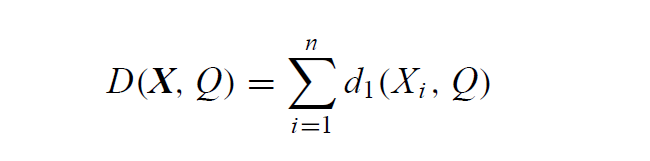
<cite>Quoted from Huang (1998), page 289</cite>

<p>This equation is telling us that value of the Mode (D) is equal to a function of a set of objects (X) compared with our Mode (Q). It is equal to the sum of the distances of all the objents in our set (n). Our goal is to make this value as small as possible and we will have succeeded if the relative frequency of matches in our cluster is greater than or equal to the relative frequency of mismatches in our clusters. This is according to the Theorem stated by Huang(1998) on page 289:</p>

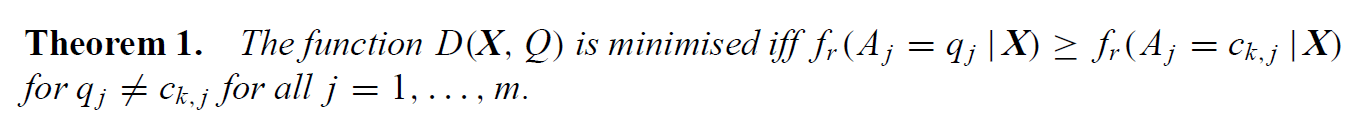
<cite>Quoted from Huang(1998), page 289</cite>

<p>So our goal is to make the sum of the distances for all of the objects in the cluster as small as possible. Another thing we have to pay attention to is the relative frequency of no only the matches, but also the mismatches. Since our distance measure is a measure of the mismatches, as long as the number of mismatches is less than or equal to fifty percent of the total number of attributes for each object in the cluster, we have succeeded in satisfying the Theroem in Huang(1998). Satisfying the theorem will allow to know that we have an actual cluster instead of a collection of unrelated objects.</p>
<p style='text-indent: 2em;'>When we go to update the our modes (Q), what we will have to do is reassign the attribute values of Q according to the attributes that are the most frequent within our clusters. To restate this one more time, we will be allocating objects X to our clusters represente by Q (any number of Q) based on whether the frequency of attribute matches between X and Q is greater than or equal to the number of mismatches; then we will update Q with the most requent attribute values occurring in our clusters, and we will repeat the process until Q can no longer be updated and the objects no longer shift from one cluster to another.</p>

<h4>Evaluating K-Modes</h4>
<p style='text-indent: 2em;'>When it comes to evaluating our K-Modes algorithm, there are a couple things that we can look at to determine if we have clustered our data in the best way possible. The first of these options is what is referred to as the total cost; which is represented by the following equation from Huang(1998): </p>

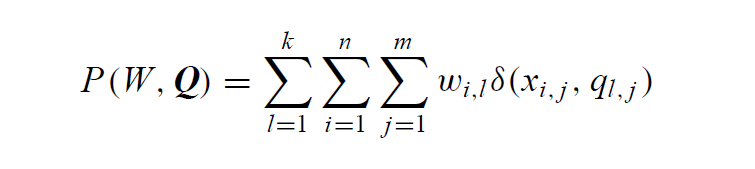
<cite>Quoted from Huang(1998), page 290</cite>

<p>Total cost (P) in this equation is a function of the entire dataset (W) and our cluster modes (Q). It is the sum of all of the dissimilarities for all of the attributes of a give object x, for all objects in the cluster, for all clusters in the dataset. Following the pattern for every other aspect of the algorithm, our goal is to minimize the total cost as much as possible, so the lower P is, the better we have clustered our data. It should be the case that as we increase the number of clusters (Q), the total cost of our dataset should decrease; allowing us to use total cost as an equivalen measure for the K-Mean's error, and therefore enabling us to use this measure as the basis for the 'elbow method'. It should also be the case that as our clusters get refined through iteration, that this value (P) will decrease as well. Therefore, if we do not know how many clusters we should have in our dataset, we can run the algorithm with a range of possible numbers of clusters (represented above as 'k'), calculate the total cost at each value of k after the algorithm has finished, and select the value of k at the point where the total cost stop decreasing in significant amounts.</p>
<p>Another way we can evaluate the results of the clustering results is to calculate the clustering accuracy and error, assuming that we know in advance how many clusters there should be in our data and which objects should be part of which clusters. Huang(1998) used the following equation to calculate accuracy: accuracy is equal to the sum of all correctly clustered objects in each cluster, divided by the total number of objects. Note that objects incorrectly assigned are not counted. The error is equal to one minus the accuracy (Huang, 1998:293-294). If we do not know in advance the structure of our data, we will have to rely on clustering that minimizes the total cost the most.</p>
<p style='text-indent: 2em;'>There is one final point to address before moving on; when we calculate the distances, should we get an object that has an equal distance compared with more the one mode at a time, we randomly assign this object to a cluster.</p>

<h4>Choosing the Initial Modes</h4>
<p style='text-indent: 2em;'>There is one more aspect of the K-Modes algorithm to discuss before we move on to actually implementing the algorithm; and that is choosing the initial modes for our clusters. We may not know how many clusters we need; though we can use total cost as a means for estimating the appropriate number of clusters. But how do we choose the starting values for the attribtues for our initial Qs? Huang(1998) gives us two different approaches.</p>
<ul>
    <li>We could randomly select an object from our dataset to serve as the initial Q (Huang, 1998: 290). This is essentially the same as choosing random centroids in the traditional K-Means algorithm. This will work; however, an unlucky or unfortunate selection for the initial mode can result in clusters that are not as good as a the clusters we would get from a lucky slection. In other words, the same problem that resulted in the K-Means++ algorithm.</li>
    <li>The second option is analogous to how K-Means++ chooses initial centroids. This second method is a three step process where the frequencies of all attribute values for all categories are calculated and then the most frequent values are assigned to the initial modes (Huang, 1998: 290-291). Huang (1998) used a special way for assigning the most frequent values. Huang (1998) first created a matrix containing all of the possible values for each category, ranked from the most frequent at the top, to the least frequent at the bottom. Then the first mode would be assigned the most frequen value for the first category, the second most frequent value for the second category, the third most frequent for the next category, and so on for each category in the data set according to this pattern. In the event that more than one cluster is being initialized, then the second cluster starts with the second most frequen value for the first attribute, then follows the same patter with each category being assigned the next most frequent value after the one assigned to the first mode. If when following this pattern, you reach the end of the frequency list for the values of a given category, you just start over from the top again. This is the pattern used by Huang(1998) for the assigning attribute values to the initial modes. Once all modes have had initial values selected according to this pattern, Huang (1998) recommends that each modes be compared to the entire dataset and replaced with the objects in the dataset that are the most similar to the Modes. These objects then serve as the initial modes for each of our clusters.</li>
</ul>

<h2>Exploring the Dataset</h2>
<p style='text-indent: 2em;'>Now that we have thoroughly covered how the K-Modes algorithm functions, we are ready to examine our dataset and being implementing the K-Modes algorithm. The dataset that we are using in this notebook came from FiveThirtyEight and it was collected using a survey designed to measure men's attitudes about masculinity. A copy of the survey itself is available on FiveThirtyEight's <a href='https://github.com/fivethirtyeight/data/tree/master/masculinity-survey' target=_blank>Github repository</a>. Since we have already imported all of the modules that we need for this project as well as the dataset, we can begin immediately by inspecting the pandas dataframe that we stored the data in above.</p>

In [3]:
# Inspect the dataset
data.head()

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,...,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
3,4,5/10/18 7:27,5/10/18 7:31,Very masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
4,5,5/10/18 7:35,5/10/18 7:42,Very masculine,Very important,Not selected,Not selected,Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400


In [4]:
data.shape

(1189, 98)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Data columns (total 98 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1189 non-null   int64  
 1   StartDate    1189 non-null   object 
 2   EndDate      1189 non-null   object 
 3   q0001        1189 non-null   object 
 4   q0002        1189 non-null   object 
 5   q0004_0001   1189 non-null   object 
 6   q0004_0002   1189 non-null   object 
 7   q0004_0003   1189 non-null   object 
 8   q0004_0004   1189 non-null   object 
 9   q0004_0005   1189 non-null   object 
 10  q0004_0006   1189 non-null   object 
 11  q0005        1189 non-null   object 
 12  q0007_0001   1189 non-null   object 
 13  q0007_0002   1189 non-null   object 
 14  q0007_0003   1189 non-null   object 
 15  q0007_0004   1189 non-null   object 
 16  q0007_0005   1189 non-null   object 
 17  q0007_0006   1189 non-null   object 
 18  q0007_0007   1189 non-null   object 
 19  q0007_

In [6]:
# inspect columns names
data.columns

Index(['Unnamed: 0', 'StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001',
       'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006',
       'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008',
       'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009',
       'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007',
       'q0013', 'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
      

<p style='text-indent: 2em;'>The survey sheet itself contains thirty different questions, almost all of which collect categorical data; however, a small number of questions are open-ended. These open ended questions though have been omitted from the dataset, so we do not have to worry about them. In regards to the rest of the questions in the survey, some of them permit respondents to write in their own answers in addition to providing a set of potential answers to choose from. In addition to these semi-open-ended questions, there are a few questions which are conditional; that is to say these questions were only asked to respondents if and only if they responded in a certain way on a previous question. Before we being attempting to cluster the data, we will need to decide what to do with the data collected for these questions. Another point that is worth noting is that multi-part questions are treated as distinct attributes in the dataset. For example, question number seven collects data on eleven different features and each of these eleven different features are represented in their own columns in the dataset. Additional features of our dataset that are worth noting are that our dataset contains 1189 objects and 98 features, with nearly all of the values in the dataset being recorded as strings (objects in pandas). Pandas objects take up a lot of resources in our computer, so in cases where we are working with really large datasets, we may wish to convert all of these strings to integers before we begin clustering the data; however, in this case, this is not a pressing problem since our dataset is relatively small.</p>
<p style='text-indent: 2em;'>Now that we have previewed our dataset, we need to decide which variables we are going to use for our K-Modes algorithm. For this notebook, we will focus on the entire dataset. All of the questions in the survey, except for the excluded open-ended questions, are represented as unique columns, even the various subparts of larger questions. However, there are a few columns that we can drop, namely: 'Unnamed: 0', 'StartDate', 'EndDate', and 'Weight'. We can also drop columns recording other features of metadata, such as 'q0036', which records the device used to for the survey. The dataset already comes with some columns that aggregate data in other columns so we need to decide what to do with these columns. Question 30 though will be dropped in favor of it's aggregated version stored in column 'q0035'. This is because question 30 asks for the state the respondent is from, meaning that there are 50 relatively low frequency values in for question 30. This is not as useful as the aggregated version, so we will drop the original from the dataset. To draw a better contrast between different clusters, we will also drop the most condensed version of the race variable as well as the original: 'race2', 'q0028'; as well as two versions of the education variable: 'educ3' and the original, 'q0029'. we can also drop the one of the columns related with respondents having children; we'll drop the original and keep the condensed version. We can also drop on of the two columns recording data concerning sexual orientation; we'll drop the original and keep the aggregated one.</p>

In [7]:
# remove unneccessary columns from the dataset
data.drop(['Unnamed: 0', 'StartDate', 'EndDate', 'q0030', 'q0036', 'race2', 'q0029', 'q0025_0001', 'q0025_0002', 'q0025_0003', 'q0026', 'q0028'], axis='columns', inplace=True)

In [8]:
data.drop(['weight'], axis='columns', inplace=True)

In [9]:
# inspect dataframe shape
data.shape

(1189, 85)

In [10]:
data.head()

,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,q0004_0006,q0005,q0007_0001,...,q0022,q0024,q0034,q0035,racethn4,educ3,educ4,age3,kids,orientation
0,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,Not selected,Yes,Often,...,No,Never married,"$0-$9,999",Middle Atlantic,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual
1,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,Yes,Rarely,...,No,Widowed,"$50,000-$74,999",East North Central,White,Some college,Some college,65 and up,Has children,Straight
2,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Other (please specify),No,Sometimes,...,No,Married,"$50,000-$74,999",East North Central,White,College or more,College or more,35 - 64,Has children,Straight
3,Very masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,Not selected,No,Rarely,...,No answer,Married,"$50,000-$74,999",East North Central,White,Some college,Some college,65 and up,Has children,No answer
4,Very masculine,Very important,Not selected,Not selected,Other family members,Not selected,Not selected,Not selected,Yes,Sometimes,...,No,Never married,"$50,000-$74,999",East North Central,White,College or more,College or more,35 - 64,No children,Straight


<h2>Implementing the K-Modes Algorithm</h2>
<p style='text-indent: 2em;'>So we have now selected the data that we will be using with the K-Modes algorithm. The first thing that we need to do now is to select our initial modes so that we can begin implementing the K-Modes algorithm. Although it is not the most effective approach, selecting our initial modes randomly from our set is the easiest approach to implement in Python; so this is the approach that we will use here. We have 1189 objects in our dataset in total, so we need to pick a set of random objects from this set to serve as our inital modes. We will also need to initialize a list of labels for all of our objects so that we can assign labels to each of them that correspond to the clusters they belong to.</p>

<h3 style='text-align: center;'>Clustering with a Single Mode</h3>

In [11]:
# initialize labels 
labels = np.zeros(len(data.index))
print(len(labels))

1189


<p style='text-indent: 2em;'>We have now initalize our list of labels. This will where we store all of the cluster assignments for each of the objects in our dataset. The next thing we have to do is convert our pandas dataframe into a numpy array so that we can iterate over all of the attributes for each object in our dataset. Luckily, there is a function in pandas that we can use that will do this for us: .to_numpy(). This function has a parameter called 'dtpye' and we can pass it an argument 'str' to set 'string' as the datatype for the array.</p>

In [12]:
# convert dataframe to numpy array
data_array = data.to_numpy(dtype='str')

In [13]:
# select an object from array to demonstrate that the dataframe has been turned into an array
data_array[100]

array(['Somewhat masculine', 'Somewhat important',
       'Father or father figure(s)', 'Mother or mother figure(s)',
       'Other family members', 'Pop culture', 'Friends', 'Not selected',
       'No', 'Rarely', 'Rarely', 'Often', 'Sometimes',
       'Never, but open to it', 'Sometimes', 'Never, and not open to it',
       'Often', 'Rarely', 'Never, but open to it', 'Rarely',
       'Not selected', 'Your weight', 'Not selected', 'Your physique',
       'Not selected', 'Not selected', 'Not selected', 'Not selected',
       'Not selected', 'Not selected', 'Not selected', 'Not selected',
       'Employed, working part-time', 'Not selected', 'Not selected',
       'Not selected', 'Not selected', 'Not selected', 'Not selected',
       'None of the above', 'Not selected',
       'Managers want to hire and promote women',
       'Greater risk of being accused of sexual harassment',
       'Greater risk of being accused of being sexist or racist',
       'Not selected', 'Not selected', 'Not 

In [14]:
print(len(data_array))
print(len(data_array[100]))

1189
85


<p style='text-indent: 2em;'>We from the output above that we have successfully turned the pandas dataframe into a numpy array that contains all of the category values for each of the objects in our dataset. This array is what we will iterate through in order to cluster our data with the K-Modes algorithm. we will also need to initialize one more array that will be used to hold a list of distances for each object so that we can choose which cluster to assign the object to.</p>
<p style='text-indent: 2em;'>Before we perform the first iteration, we will select one random object from our dataset to serve as a mean and we will calculate the differences between this object and all the objects in the dataset. We know that we have 86 different attribute values for each object; so inorder to satifsy the theorem expressed in Huang(1998) which says the mode in minimized if the relative frequency of mismatches is less than or equal to the number of matches, we will only cluster objects together with our random mode if and only if the objects share at least 43 attributes in common with the randomly selected mode. This will minimize minimize the mode and satisfy the theorem.</p>
<p style='text-indent: 2em;'>We will also calculate the total cost for the entire dataset, which is the sum of all of the differences for all clusters in the dataset. We can expect that the total cost when we only have one mode will be very high.</p>

In [15]:
# initialize number of initial modes 'k'
k = 1

# randomly select an integer value from the range covered by the indices in our dataset
initial_mode_index = np.random.randint(0, 1189, size=1)
print(initial_mode_index)

# select object with corresponding index value and set object as the value of Q, our cluster mode
Q = data_array[initial_mode_index]
print(Q)

[222]
[['Somewhat masculine' 'Somewhat important' 'Father or father figure(s)'
  'Not selected' 'Not selected' 'Not selected' 'Not selected'
  'Not selected' 'Yes' 'Sometimes' 'Rarely' 'Rarely' 'No answer'
  'Never, but open to it' 'Often' 'Never, and not open to it' 'Often'
  'Rarely' 'Never, and not open to it' 'Rarely' 'Not selected'
  'Your weight' 'Not selected' 'Not selected' 'Not selected'
  'Not selected' 'Not selected' 'Not selected' 'Not selected'
  'Your finances, including your current or future income, assets, or debt'
  'Your ability to provide for your family, current or anticipated'
  'Not selected' 'Employed, working full-time' 'Not selected'
  'Not selected' 'Not selected' 'Not selected' 'Not selected'
  'Not selected' 'None of the above' 'Not selected'
  'Managers want to hire and promote women'
  'Greater risk of being accused of sexual harassment' 'Not selected'
  'Not selected' 'Not selected' 'Not selected' 'Not selected'
  'Not selected' 'Not selected' 'Not selec

<p style='text-indent: 2em;'>We have now obtained our randomly chosen mode for the first iteration. Our next step is to compare this mode with all of the objects in the dataset with this mode and calculate the distance for each object. Before we do this, lets think a bit about what we want to acheive; we want to iterate through all of the attributes in two objects simultaneously, compare their values, and increment a value recording the distance should those two values not match. We also want to write this code in a function so that we can easily run this code again later.</p>

In [16]:
'''
To loop through all of the attributes for two objects and compare them to get the distances that we need;
we will have to iterate through the indexes for both our mode (Q) and our object (X). All of our objects have 86 attributes,
so if we make a range of integers that is 86 digits long and zero-indexed, we should be able to iterate through that range to
compare the attribute values of both objects. When we iterate though this range of index values, we will compare the attribute 
values of our objects at each index value; should they be different, we will increment a variable (distance) by one, for each
set of values that are not equal. We can do this using numpy's np.char.compare_chararrays() function. This function will return
boolean value depending on if the strings stored in the arrays match the stated criteria. So here, we passed '!=' as our
criteria. This means the function will return True if the strings are not equal. Note: we had to pass Q[0] to our function
because our mode somehow got nested within an array. Once we get this array of Booleans, we can iterate through them, counting 
all of the True values. This will give us the distance between our two objects.
'''
def get_mode_object_comparision(mode, obj):
    return np.char.compare_chararrays(mode, obj, '!=', True)

mode_and_obj50 = get_mode_object_comparision(Q[0], data_array[50])
print(mode_and_obj50)

[False  True False False False False  True False False False  True  True
  True  True  True False  True False  True  True False False False False
 False False False False False  True  True False  True  True False False
  True False False  True False  True False  True False False False False
 False False False False False False  True  True  True  True False False
 False False False False False  True  True False False False False False
 False False False False  True  True  True False False  True  True False
 False]


In [17]:
distance = 0
for boolean in mode_and_obj50:
    if boolean == True:
        distance +=1
print(distance)

29


<p style='text-indent: 2em;'>We have now successfully managed to iterate through the attribute values for both of our objects; our mode and our test object, and we obtained a distance of 52. Now, the next step is to combine all of this together and obtain the distances of all of our objects.</p>

In [18]:
'''
We are going to use our empty distances list that we created above for this step.
'''

def calculate_distances(mode, objects):
    # get the number of objects so we can iterate through the dataset based on index positions
    obj_num = len(data_array)
    
    # initialize distances array
    distances = []
    
    #loop through the objects
    for i in range(obj_num):
        
        # get distance array
        dist_array = np.char.compare_chararrays(mode, objects[i], '!=', True)
        
        # initialize count variable
        distance = 0
        
        # loop through distance array
        for value in dist_array:
            
            # increment count variable
            if value == True:
                distance += 1
            
        # append distance to distances array
        distances.append(distance)
    
    # return our calculated distances
    return distances


In [19]:
distances = calculate_distances(Q[0], data_array)
print(distances)

[57, 52, 31, 48, 23, 28, 38, 46, 23, 31, 31, 46, 47, 35, 62, 49, 32, 26, 25, 46, 58, 31, 32, 26, 47, 27, 48, 55, 42, 50, 19, 55, 42, 49, 20, 36, 38, 44, 52, 53, 50, 30, 24, 43, 38, 53, 43, 44, 54, 39, 29, 57, 44, 52, 32, 47, 45, 51, 25, 48, 42, 51, 50, 33, 29, 31, 20, 44, 45, 57, 22, 48, 28, 52, 49, 40, 35, 28, 39, 23, 38, 47, 44, 53, 36, 47, 56, 30, 47, 56, 47, 43, 21, 34, 43, 28, 38, 48, 46, 42, 22, 44, 38, 28, 47, 27, 55, 51, 40, 21, 53, 34, 33, 24, 27, 45, 29, 52, 52, 41, 49, 43, 45, 24, 47, 44, 34, 31, 48, 27, 19, 48, 30, 53, 43, 28, 49, 41, 32, 61, 43, 50, 38, 21, 58, 29, 48, 43, 23, 31, 25, 34, 32, 32, 28, 30, 40, 34, 22, 30, 43, 28, 50, 34, 36, 51, 24, 57, 37, 48, 54, 27, 54, 48, 31, 52, 31, 42, 41, 29, 35, 23, 29, 33, 25, 40, 30, 34, 53, 49, 47, 45, 29, 22, 41, 45, 43, 24, 31, 54, 27, 49, 52, 30, 20, 41, 34, 29, 29, 50, 49, 40, 30, 30, 29, 45, 46, 30, 49, 40, 23, 38, 0, 45, 46, 23, 37, 24, 36, 31, 57, 27, 44, 27, 28, 54, 25, 32, 20, 52, 26, 30, 44, 40, 38, 52, 51, 21, 51, 53, 

In [20]:
print(len(distances))

1189


<p style='text-indent: 2em;'>We have now successfully calculated the distances for all objects in our dataset as compared with the single mode we randomly selected.</p>

In [21]:
'''
If we did everything correctly, then there should be a single value in our array of distances where the distance value
is zero; which would be the object serving as our mode being compared with itself. So if we print the value that shares the 
same index position as our mode, we should get a value of zero.
'''
print(distances[222])

0


<p style='text-indent: 2em;'>Now that we have calculated all of the distances for each object in the dataset relative to our mode, we can assign objects to the cluster. We will only assign objects that share at minimum 43 similarities with our mode to the cluser. so we will iterate through our distances and our labels array, and we will update the labels of the elements that we wish place in our cluster. This cluster will have the label value of 1 and everything not included in our cluster will keep the label value of 0.</p>

In [22]:
# update cluster labels 
def update_labels():
    for i in range(len(distances)):
        if (distances[i] <= (len(Q[0]) / 2)):
            labels[i] = 1
        else:
            continue

update_labels()

print(labels)

[0. 0. 1. ... 0. 1. 0.]


<p style='text-indent: 2em;'>Now that we have updated the cluster labels, the next thing that we need to do is update the values of the different attributes for our modes. This means we need to access all of the objects in our cluster, count the number of times each attribute value appears in that cluster, then set the most frequent values as the values for the attributes of our new modes. How can we do this?</p>

In [23]:
'''
We may be able to do this by selecting all of the objects in our cluster, putting them in their own array, and converting 
them to a pandas dataframe.
'''
# select objects in cluster and assign them to their own cluster array:
cluster_array = []
def select_cluster_objects():
    for i in range(len(labels)):
        if labels[i] == 1:
            cluster_array.append(data_array[i])
select_cluster_objects()
print(cluster_array)

[array(['Very masculine', 'Not too important',
       'Father or father figure(s)', 'Not selected', 'Not selected',
       'Not selected', 'Not selected', 'Other (please specify)', 'No',
       'Sometimes', 'Sometimes', 'Sometimes', 'Rarely',
       'Never, but open to it', 'Often', 'Never, and not open to it',
       'Rarely', 'Sometimes', 'Rarely', 'Never, and not open to it',
       'Not selected', 'Not selected', 'Not selected', 'Not selected',
       'Not selected', 'Not selected', 'Not selected', 'Not selected',
       'Your physical health', 'Not selected', 'Not selected',
       'Not selected', 'Employed, working full-time', 'Not selected',
       'Not selected', 'Not selected', 'Not selected', 'Not selected',
       'Not selected', 'None of the above', 'Not selected',
       'Managers want to hire and promote women', 'Not selected',
       'Not selected', 'Not selected', 'Not selected', 'Not selected',
       'Not selected', 'Not selected', 'Not selected', 'Not selected',
    

In [24]:
'''
Check to see if the number of objects in our cluster array equals the number of ones in our labels array
'''
count = 0
for i in labels:
    if i == 1:
        count +=1
print('number of labels with value 1 in labels: ', count)
print('number of objects in cluster array: ', len(cluster_array))

number of labels with value 1 in labels:  627
number of objects in cluster array:  627


<p style='text-indent: 2em;'>So we have now selected all of the objects in our cluster and placed them into their own special array. Now we can try converting this array to back into a pandas dataframe to calculate the most frequent values in each column.</p>

In [25]:
'''
We will now attempt to conver the cluster array into a pandas dataframe
'''
cluster_df = pd.DataFrame(cluster_array)

In [26]:
cluster_df.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Other (please specify),No,Sometimes,...,No,Married,"$50,000-$74,999",East North Central,White,College or more,College or more,35 - 64,Has children,Straight
1,Very masculine,Very important,Not selected,Not selected,Other family members,Not selected,Not selected,Not selected,Yes,Sometimes,...,No,Never married,"$50,000-$74,999",East North Central,White,College or more,College or more,35 - 64,No children,Straight
2,Very masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,Yes,"Never, but open to it",...,No,Married,"$200,000+",East North Central,White,College or more,Post graduate degree,65 and up,Has children,Straight
3,Somewhat masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Friends,Not selected,No,Sometimes,...,No,Never married,"$25,000-$49,999",West North Central,Other,College or more,Post graduate degree,18 - 34,Has children,Gay/Bisexual
4,Very masculine,Not at all important,Father or father figure(s),Not selected,Not selected,Not selected,Friends,Not selected,No,Sometimes,...,No,Married,"$100,000-$124,999",Pacific,Hispanic,Some college,Some college,35 - 64,Has children,Straight


In [27]:
cluster_df.shape

(627, 85)

<p style='text-indent: 2em;'>We successfully converted the cluster array into a pandas dataframe. Now we can use pandas to count the number of times unique values in each column appear. To do this, we should be able to use value_counts() to calculate the frequency of column values.</p>

In [28]:
def column_frequencies(dataframe):
    frequencies = {}
    for column in dataframe:
        frequencies[column]= dataframe[column].value_counts()
    return frequencies

cluster1_frequencies = column_frequencies(cluster_df)
print(cluster1_frequencies[0])

Somewhat masculine      330
Very masculine          238
Not very masculine       45
Not at all masculine      8
No answer                 6
Name: 0, dtype: int64


In [29]:
cluster1_frequencies

{0: Somewhat masculine      330
 Very masculine          238
 Not very masculine       45
 Not at all masculine      8
 No answer                 6
 Name: 0, dtype: int64,
 1: Somewhat important      273
 Not too important       204
 Not at all important     82
 Very important           66
 No answer                 2
 Name: 1, dtype: int64,
 2: Father or father figure(s)    441
 Not selected                  186
 Name: 2, dtype: int64,
 3: Not selected                  377
 Mother or mother figure(s)    250
 Name: 3, dtype: int64,
 4: Not selected            424
 Other family members    203
 Name: 4, dtype: int64,
 5: Not selected    512
 Pop culture     115
 Name: 5, dtype: int64,
 6: Not selected    421
 Friends         206
 Name: 6, dtype: int64,
 7: Not selected              515
 Other (please specify)    112
 Name: 7, dtype: int64,
 8: Yes          346
 No           279
 No answer      2
 Name: 8, dtype: int64,
 9: Sometimes                    297
 Rarely                       16

<p style='text-indent: 2em;'>We have now successfully obtained a dictionary containing the frequencies for all of the attribute values for each column in our cluster's dataframe. We can now select from this dictionary the most frequent values. However, there is an easier way of obtaining the modes for our updated cluster mode. We can simply call df.mode() on our cluster's dataframe and we can see that we get the exact same values as we did above in our dictionary with df.value_counts(). So df.mode() is the method that we shall use in our finished algorithm. We can then take this mode, store it in it's own dataframe, convert it back into an numpy array, and finally set this array as our updated mode. We have now built the code necessary to update our cluster modes.</p>

In [30]:
cluster_mode = cluster_df.mode()
cluster_mode

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,Yes,Sometimes,...,No,Married,"$50,000-$74,999",South Atlantic,White,College or more,College or more,35 - 64,Has children,Straight


In [31]:
new_mode = pd.DataFrame(cluster_mode)
new_mode

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,Not selected,Yes,Sometimes,...,No,Married,"$50,000-$74,999",South Atlantic,White,College or more,College or more,35 - 64,Has children,Straight


In [32]:
'''
We have now converted the cluster mode back into a numpy array that can once again be used to get the distances
for all our objects and update our cluster labels. We have now found solutions for building the following parts of the
algorithm: choosing random cluster means for the initial iteration, calculating the distances for each of our objects relative
to a cluster mean, updating the cluster labels for our objects, and finding the most frequent attribute values for each 
column in our clusters and converting that information into a new mode in preparation for the next iteration. But at this point
we still have a few more problems to find solutions for in order to finish building the algorithm. We need to build a loop that
will run until our modes have reached convergence, and we need to be able to calculate the distance for more than one cluster
mode for each object and then assign cluster labels.
'''

new_mode_array = new_mode.to_numpy(dtype='str')
new_mode_array

array([['Somewhat masculine', 'Somewhat important',
        'Father or father figure(s)', 'Not selected', 'Not selected',
        'Not selected', 'Not selected', 'Not selected', 'Yes',
        'Sometimes', 'Sometimes', 'Rarely', 'Rarely',
        'Never, and not open to it', 'Often',
        'Never, and not open to it', 'Often', 'Sometimes',
        'Never, but open to it', 'Rarely', 'Not selected', 'Your weight',
        'Not selected', 'Not selected', 'Not selected', 'Not selected',
        'Not selected', 'Not selected', 'Your physical health',
        'Your finances, including your current or future income, assets, or debt',
        'Not selected', 'Not selected', 'Employed, working full-time',
        'Not selected', 'Not selected', 'Not selected', 'Not selected',
        'Not selected', 'Not selected', 'None of the above',
        'Not selected', 'Not selected', 'Not selected', 'Not selected',
        'Not selected', 'Not selected', 'Not selected', 'Not selected',
        'Not se

<p style='text-indent: 2em;'>In order to build the loop that we will need to iterate our data until we reach convergence, we can use the .all() function in order to build the conditions under which our loop will terminate. The condition will be that the loop will run until the distance between the modes for the interation N and iteration N+1 is equal to zero. When this happens, we will know that our cluster modes have stabilized and the objects in our clusters should no longer shift from one cluster to another. This means we need to keep track of the cluster modes at three different points: the initial randomly generated modes, and two versions of the upadated modes for comparison in our loop. After that, all we need to do is successfully calculate the modes for more than one cluster and appropriately label our objects according to the distances calculated for each mode. This will result in our array of distances becoming a two dimensional array from which we will need to select the minimum value for each object.</p>

In [33]:
# get cluster modes
Qi = Q[0]
Qu = new_mode_array[0]
    
# initalize mode difference
mode_difference = 0
    
# compare old and new cluster modes
mode_difference_array = get_mode_object_comparision(Qi, Qu)
    
# calculate mode difference
for i in mode_difference_array:
    if i == True:
        mode_difference += 1
    else:
        continue

mode_difference

14

In [34]:
# run loop
while mode_difference != 0:
        
    # compare all objects with new mode
    new_distances = calculate_distances(Qu, data_array)
        
    # update labels
    for i in range(len(new_distances)):
        if(distances[i] <= (len(Qu[0]) / 2)):
            labels[i] = 1
        else:
            continue
        
    # select objects in cluster
    new_cluster_array = []
        
    for i in range(len(labels)):
        if labels[i] == 1:
            new_cluster_array.append(data_array[i])
                
    # convert to dataframe
    new_cluster_df = pd.DataFrame(new_cluster_array)
        
    # get new cluster mode
    new_cluster_mode = pd.DataFrame(new_cluster_df.mode())
        
    # convert new cluster mode to numpy array
    new_cluster_mode_array = new_cluster_mode.to_numpy(dtype='str')
        
    # reassign initial mode
    Qi = Qu
        
    #reassign update mode
    Qu = new_cluster_mode_array[0]
        
    # compare modes
    mode_diff_array = get_mode_object_comparision(Qi, Qu)
        
    # initialize count
    count = 0
        
    # calculate mode difference
    for i in mode_diff_array:
        if i == True:
            count += 1
        else:
            continue
        
    # reassign mode difference
    mode_difference = count
        
print('iteration complete')

iteration complete


<p style='text-indent: 2em;'>We have now completed iterating the algorithm. Let's now confirm that we have indeed obtained a stable mode.</p>

In [35]:
mode_difference

0

In [36]:
Qi

array(['Somewhat masculine', 'Somewhat important',
       'Father or father figure(s)', 'Not selected', 'Not selected',
       'Not selected', 'Not selected', 'Not selected', 'Yes', 'Sometimes',
       'Sometimes', 'Rarely', 'Rarely', 'Never, and not open to it',
       'Often', 'Never, and not open to it', 'Often', 'Sometimes',
       'Never, but open to it', 'Rarely', 'Not selected', 'Your weight',
       'Not selected', 'Not selected', 'Not selected', 'Not selected',
       'Not selected', 'Not selected', 'Your physical health',
       'Your finances, including your current or future income, assets, or debt',
       'Not selected', 'Not selected', 'Employed, working full-time',
       'Not selected', 'Not selected', 'Not selected', 'Not selected',
       'Not selected', 'Not selected', 'None of the above',
       'Not selected', 'Not selected', 'Not selected', 'Not selected',
       'Not selected', 'Not selected', 'Not selected', 'Not selected',
       'Not selected', 'Not selected'

In [37]:
Qu

array(['Somewhat masculine', 'Somewhat important',
       'Father or father figure(s)', 'Not selected', 'Not selected',
       'Not selected', 'Not selected', 'Not selected', 'Yes', 'Sometimes',
       'Sometimes', 'Rarely', 'Rarely', 'Never, and not open to it',
       'Often', 'Never, and not open to it', 'Often', 'Sometimes',
       'Never, but open to it', 'Rarely', 'Not selected', 'Your weight',
       'Not selected', 'Not selected', 'Not selected', 'Not selected',
       'Not selected', 'Not selected', 'Your physical health',
       'Your finances, including your current or future income, assets, or debt',
       'Not selected', 'Not selected', 'Employed, working full-time',
       'Not selected', 'Not selected', 'Not selected', 'Not selected',
       'Not selected', 'Not selected', 'None of the above',
       'Not selected', 'Not selected', 'Not selected', 'Not selected',
       'Not selected', 'Not selected', 'Not selected', 'Not selected',
       'Not selected', 'Not selected'

In [38]:
# compare modes
mode_diff_array = get_mode_object_comparision(Qi, Qu)
mode_diff_array

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [39]:
# initalize mode difference
difference = 0
    
# calculate mode difference
for i in mode_diff_array:
    if i == True:
        mode_difference += 1
    else:
        continue

difference

0

<p style='text-indent: 2em;'>We have indeed obtained a stable mode for our cluster. Now we can look at the custer mode to see what attributes characterize our cluster.</p>

In [40]:
'''
Check to see if the number of objects in our cluster array equals the number of ones in our labels array
'''
count = 0
for i in labels:
    if i == 1:
        count +=1
print('number of labels with value 1 in labels: ', count)
print('number of objects in cluster array: ', len(cluster_array))

number of labels with value 1 in labels:  627
number of objects in cluster array:  627


<p style='text-indent: 2em;'>We have with one mode, identified a cluster within our dataset with 627 members. But if we consider all of the unclustered objects to me "misclassified", we can calculate the clustering accuracy and error of our algorithm using one mode. </p>

In [42]:
clustering_accuracy = (627 / 1189)
clustering_accuracy

0.5273338940285954

In [44]:
error = 1 - clustering_accuracy
error

0.47266610597140457

<p style='text-indent: 2em;'>These are definitely not great values for our clustering; having only used a single mode to cluster our data, we were only able to cluster about 50% of the objects in our dataset. Therefore, we should increase the number of clusters that we use to cluster our data.</p>

<h2 style='text-align: center;'>References</h2>

<cite>Huang, Zhexue. 1998. Extensions to the K-Means Algorithm for Clustering Large Data Sets with Categorical Values. Data Mining and Knowledge Discovery 2, 283-304. Retrived from: http://www.cs.ust.hk/~qyang/Teaching/537/Papers/huang98extensions.pdf</cite> 